In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from tqdm import tqdm

esercizio 1

In [3]:
#generating data
x = np.linspace(-1.5, 3 , 100)
pol = -0.1*x**5-0.4*x**4 +1.2*x**3 +x**2-2.3*x
y = pol + 1.5*(np.random.rand(x.size)-0.5)

#setting the range of alphas and number of functions to iterate through
alphas = np.logspace(-2, 2, 5)
n_max = 50

#function definitions
def gaussian(x, mu, alpha):
    return np.exp(-(x-mu)**2/alpha)

#this funciton creates the features matrix
def fill_features_matrix(x, mu, alpha_arr):
    if mu.size != alpha_arr.size:
        raise Exception('size of mu and alpha must be the same')
    
    features = np.zeros((x.size, mu.size + 1))
    features[:, 0] = np.ones(x.size)

    for i in range(mu.size) :
        features[:, i+1] = gaussian(x, mu[i], alpha_arr[i])
    return features

In [4]:
#dividing data in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

lin_reg_list = []
coefs = []
train_errors = []
test_errors = []

#looping through alphas and number of functions:
for n in tqdm(range(1,n_max+1)):
    for a in alphas:
        lin_reg = linear_model.LinearRegression()
        mu = np.linspace(-1.5, 3, n)
        alpha_arr = a*np.ones(n)
        features_test = fill_features_matrix(x_test, mu, alpha_arr)
        features_train = fill_features_matrix(x_train, mu, alpha_arr)

        lin_reg.fit(features_train, y_train)
        coefs.append(lin_reg.coef_.tolist())
        train_errors.append(lin_reg.score(features_train, y_train))
        test_errors.append(lin_reg.score(features_test, y_test))

        lin_reg_list.append(lin_reg)

100%|██████████| 50/50 [00:00<00:00, 314.92it/s]


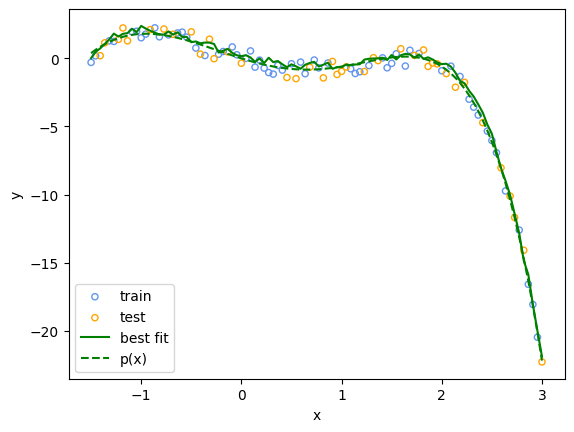

In [5]:
#plotting
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, label="train", s = 20,facecolors = 'none', edgecolors = 'cornflowerblue')
ax.scatter(x_test, y_test, label="test", s = 20, facecolors = 'none', edgecolors = 'orange')

#alpha = 100, n = 10
mu = np.linspace(-1.5, 3, 10)
features= fill_features_matrix(x, mu, alphas[4]*np.ones(10))
predicted = lin_reg_list[49].predict(features)

ax.plot(x, predicted, color = "green", label = "best fit")
ax.plot(x, pol, color = "green", linestyle = '--', label = "p(x)")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("relazione/immagini/fit_n10_a100.png", dpi = 800)

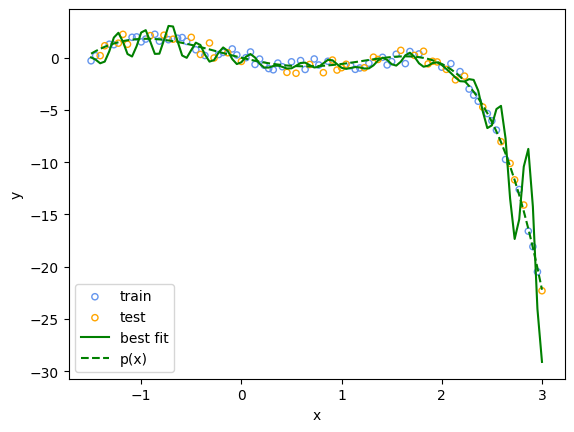

In [6]:
#plotting
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, label="train", s = 20,facecolors = 'none', edgecolors = 'cornflowerblue')
ax.scatter(x_test, y_test, label="test", s = 20, facecolors = 'none', edgecolors = 'orange')

#alpha = 0.01, n = 18
mu = np.linspace(-1.5, 3, 18)
features= fill_features_matrix(x, mu, alphas[0]*np.ones(18))
predicted = lin_reg_list[85].predict(features)

ax.plot(x, predicted, color = "green", label = "best fit")
ax.plot(x, pol, color = "green", linestyle = '--', label = "p(x)")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("relazione/immagini/fit_n18_a001.png", dpi = 800)


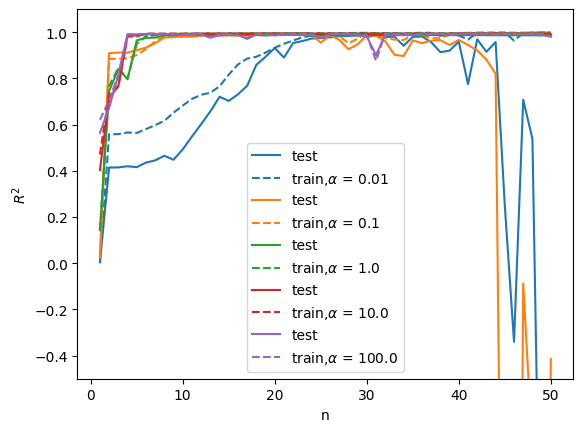

In [7]:
fig, ax = plt.subplots()
ax.set_ylim([-0.5, 1.1])
for a_ind in range(alphas.size):
    #plotting
    x_axis = np.arange(1, n_max+1)
    y_axis_test = np.array(test_errors).reshape(n_max, alphas.size)[:,a_ind]
    y_axis_train = np.array(train_errors).reshape(n_max, alphas.size)[:,a_ind]

    p = ax.plot(x_axis, y_axis_test, label = "test")
    color = p[0].get_color()
    ax.plot(x_axis, y_axis_train, label = r"train,$\alpha$ = "+str(alphas[a_ind]), linestyle= '--', color = color)

ax.legend()    
plt.xlabel("n")
plt.ylabel(r"$R^2$")
plt.savefig("relazione/immagini/performance_ex1", dpi=800)